### Life Expectancy 
Perform regression using this World Health Organization (WHO) dataset on life expectancy.   

In [1]:
import pandas as pd
data = pd.read_csv('Life Expectancy Data.csv')
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [2]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

### Life expectancy age distribution

<Axes: xlabel='Life expectancy ', ylabel='Count'>

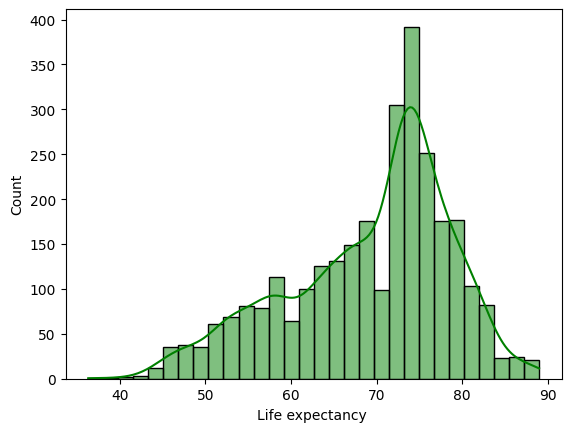

In [3]:
import seaborn as sns
sns.histplot(data['Life expectancy '].dropna(), kde=True, color='green')

### Data preprocessing
Perform data preprocessing and identify columns to be used. You may or may not use all the columns. Prepare the features and target data.
Prepare the train and test data.

(1937, 1)
(831, 1)
(1937,)
(831,)


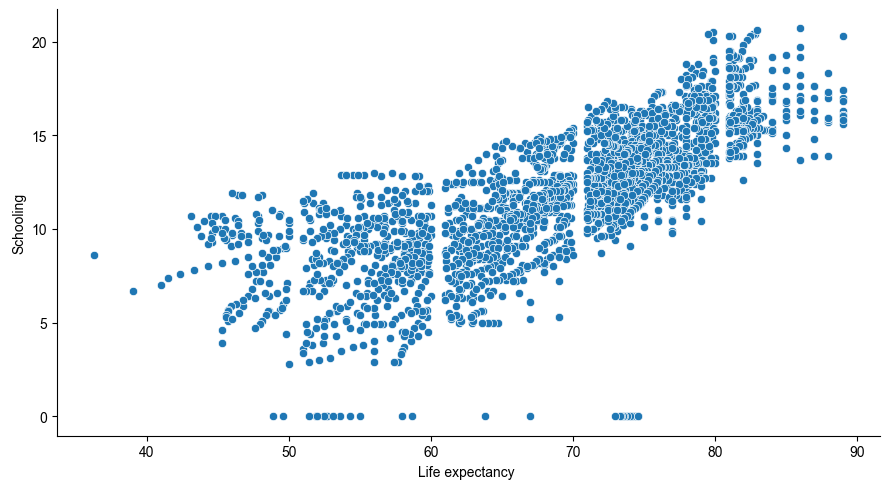

In [4]:
# Write your code here. (5 points)

# Choosing which columns to use and dropping rows with na values
cols = ["Schooling", "Life expectancy "]
processed_data = data[cols].dropna(axis=0)

# Checking if Relationship is Linear
import seaborn as sns

sns.relplot(x='Life expectancy ', y='Schooling', data=processed_data, 
            height=5.0, aspect=1.8, kind='scatter')
sns.set_style('dark')

# Constructing Feature Matrix and Response Vector
X = processed_data.iloc[:,:-1].values # feature matrix
y = processed_data.iloc[:,1].values # response vector

# Splitting Training and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


### Perform regression on the dataset.
The goal is to use regression on the dataset with the best result you can.

In [5]:
# Write your code here. (5 points)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Show results.

<Axes: xlabel='Life expectancy ', ylabel='Schooling'>

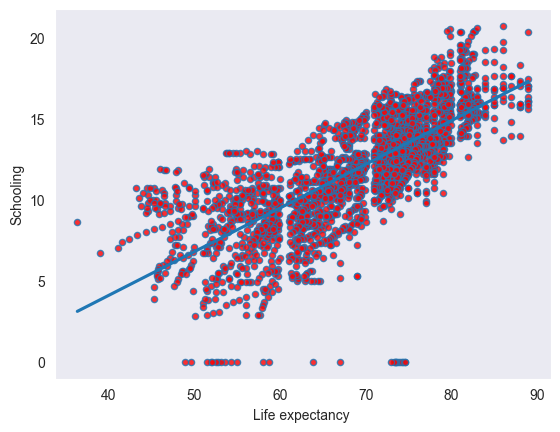

In [6]:
# Write your code here, (5 points)
regressor.coef_

sns.regplot(x='Life expectancy ', y='Schooling', data=processed_data, ci=None, scatter_kws={'s':20, 'facecolor':'red'})

In [7]:
y_pred = regressor.predict(X_test)
y_pred

array([70.53411347, 71.8225209 , 57.22057003, 66.23942204, 70.96358261,
       66.45415661, 78.69402719, 66.45415661, 69.88990976, 70.3193789 ,
       54.64375517, 68.17203318, 66.45415661, 65.59521832, 70.53411347,
       72.46672462, 67.52782947, 71.8225209 , 65.38048375, 61.72999603,
       66.66889118, 58.50897746, 73.3256629 , 80.62663834, 70.53411347,
       64.09207632, 75.90247776, 69.46044061, 49.70486002, 67.52782947,
       57.00583546, 69.88990976, 76.11721233, 65.59521832, 67.09836032,
       66.45415661, 66.23942204, 71.60778633, 65.59521832, 55.28795889,
       62.37419975, 66.02468747, 81.05610748, 72.03725547, 72.68145919,
       82.55924948, 72.68145919, 62.58893432, 72.46672462, 75.47300862,
       64.09207632, 50.77853288, 69.88990976, 76.97615062, 67.52782947,
       71.8225209 , 70.10464433, 68.38676775, 67.3130949 , 74.8288049 ,
       73.96986662, 71.60778633, 59.79738489, 65.59521832, 66.88362575,
       63.23313804, 55.07322431, 78.47929262, 77.40561976, 74.82

In [8]:
comparison_df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
comparison_df

,Actual,Predicted
0,78.0,70.534113
1,72.3,71.822521
2,60.0,57.220570
3,51.4,66.239422
4,75.6,70.963583
...,...,...
826,74.7,72.037255
827,81.0,77.405620
828,74.2,75.043539
829,73.7,72.037255


In [9]:
residuals = y_test - y_pred
residuals

array([ 7.46588653e+00,  4.77479099e-01,  2.77942997e+00, -1.48394220e+01,
        4.63641739e+00, -8.85415661e+00,  3.20597281e+00, -1.27541566e+01,
        6.11009024e+00,  4.68062110e+00, -2.64375517e+00,  1.12796682e+00,
        6.34584339e+00,  6.20478168e+00,  3.46588653e+00,  5.33327538e+00,
        4.27217053e+00,  5.77479099e-01, -9.68048375e+00, -5.22999603e+00,
       -2.68891182e-01, -1.90897746e+00,  2.87433710e+00,  7.37336166e+00,
        4.46588653e+00,  5.10792368e+00, -5.02477762e-01,  4.83955939e+00,
        7.69513998e+00,  4.47217053e+00,  4.79416454e+00,  3.71009024e+00,
        3.48278767e+00,  2.40478168e+00,  4.10163968e+00, -2.16541566e+01,
       -2.53942204e+00,  3.39221367e+00,  4.78167662e-03, -6.78795889e+00,
       -2.87419975e+00,  9.97531253e+00, -1.25610748e+00,  1.86274453e+00,
        1.21854081e+00, -1.25924948e+00,  2.11854081e+00, -3.98893432e+00,
        7.23327538e+00, -7.77300862e+00, -2.02920763e+01,  2.21467119e-01,
       -1.18990976e+00, -

Text(0, 0.5, 'Predictions')

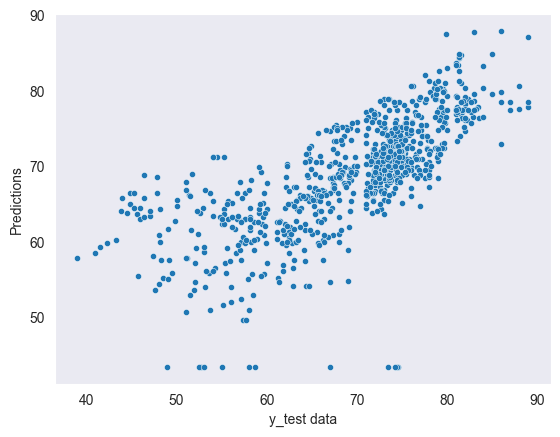

In [10]:
#Test data to prediction comparisson
import matplotlib.pyplot as plt
sns.scatterplot(x=y_test, y = y_pred,s=20)
plt.xlabel('y_test data')
plt.ylabel('Predictions')

In [11]:
#R2 Score
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.5322497268855464


### Conclusion

Write a brief conclusion here. (5 points)

We aimed to find a relationship between schooling and life expectancy by performing linear regression. The target columns' relationship were fairly linear but had some outlier data that didn't linearly fit. Nonetheless, we were able to perform linear regression. The R2 score was 0.53 which means that it is only fairly acceptable in predicting life expectancy based on schooling and needs further parameter optimization.